# PROJECT | Scraping data from Coursera website

This project is attempting to answer the question of what's the best way to learn Data Science using courses from Coursera website. For this, I scraped a list of 1000 courses and tried to answer some real-world questions any learner would want to know before deciding what's the best path for landing a Data Science job.

---

![image](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExcHNoemhrMm1yYXZlY3JvdGc3bGEyYWhhemdnaGo1YWV4a3lmbmV1MCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/a7NBvg3Ss8UYo/giphy.gif)

In [177]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import time

In [178]:
# Building a scraper using BeautifulSoup and Request libraries

headers = {'User-Agent': 'Mozilla/5.0'}
coursera = []

for i in range(1,85):
    url = f'https://www.coursera.org/courses?topic=Data%20Science&page={i}'
    html_text = requests.get(url, allow_redirects=False, headers=headers).text
    soup = BeautifulSoup(html_text, 'html.parser')
    courses = soup.find_all('li', class_ = "cds-9 css-0 cds-11 cds-grid-item cds-56 cds-64 cds-76 cds-90")
    for course in courses:
        course_name = course.find('h3', class_="cds-CommonCard-title css-6ecy9b") and course.find('h3', class_="cds-CommonCard-title css-6ecy9b").text.strip() or np.nan
        company = course.find('div', {"class": 'css-cxybwo cds-ProductCard-partners'}) and course.find('div', {"class": 'css-cxybwo cds-ProductCard-partners'}).get('title').strip() or np.nan
        degree = course.find('p', class_="css-ls7ln4") and course.find('p', class_="css-ls7ln4").text.strip() or np.nan
        score = course.find('p', class_="css-2xargn") and course.find('p', class_="css-2xargn").text.strip() or np.nan
        reviews = course.find('div', class_="product-reviews css-pn23ng") and course.find('div', class_="product-reviews css-pn23ng").p.next_sibling.text.strip() or np.nan
        skills = course.find('div', class_='cds-CommonCard-bodyContent') and course.find('div', class_='cds-CommonCard-bodyContent').b.next_sibling.text.strip() or np.nan
        level = course.find('div', class_="cds-CommonCard-metadata") and course.find('div', class_="cds-CommonCard-metadata").p.text.replace('Â·', '/').strip() or np.nan
        free = course.find('span', class_="cds-tag-status cds-tag-secondary cds-tag-default css-lzm7hc") and course.find('span', class_="cds-tag-status cds-tag-secondary cds-tag-default css-lzm7hc").div.next_sibling.text.strip() or np.nan
        course_url = course.div.a['href']
        coursera.append({
            'Course_Name': course_name,
            'Company': company,
            'Degree': degree,
            'Score': score,
            'Reviews': reviews,
            'Skills': skills,
            'Level/Cert/Time': level,
            'IsFree': free,
            'Course_Url': 'https://www.coursera.org' + course_url
            })
    
    print(f"Scraped page {i}")
    time.sleep(2)
    
data = pd.DataFrame(coursera)
data.head()

Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
Scraped page 11
Scraped page 12
Scraped page 13
Scraped page 14
Scraped page 15
Scraped page 16
Scraped page 17
Scraped page 18
Scraped page 19
Scraped page 20
Scraped page 21
Scraped page 22
Scraped page 23
Scraped page 24
Scraped page 25
Scraped page 26
Scraped page 27
Scraped page 28
Scraped page 29
Scraped page 30
Scraped page 31
Scraped page 32
Scraped page 33
Scraped page 34
Scraped page 35
Scraped page 36
Scraped page 37
Scraped page 38
Scraped page 39
Scraped page 40
Scraped page 41
Scraped page 42
Scraped page 43
Scraped page 44
Scraped page 45
Scraped page 46
Scraped page 47
Scraped page 48
Scraped page 49
Scraped page 50
Scraped page 51
Scraped page 52
Scraped page 53
Scraped page 54
Scraped page 55
Scraped page 56
Scraped page 57
Scraped page 58
Scraped page 59
Scraped page 60
Scraped page 61
Scraped page 62
Scraped page 63
S

,Course_Name,Company,Degree,Score,Reviews,Skills,Level/Cert/Time,IsFree,Course_Url
0,Google Data Analytics,Google,Make progress toward a degree,4.8,(143K reviews),"Data Analysis, R Programming, SQL, Business Co...",Beginner / Professional Certificate / 3 - 6 Mo...,NaN,https://www.coursera.org/professional-certific...
1,IBM Data Science,IBM,Make progress toward a degree,4.6,(124K reviews),"Python Programming, Data Science, Machine Lear...",Beginner / Professional Certificate / 3 - 6 Mo...,NaN,https://www.coursera.org/professional-certific...
2,IBM Data Analyst,IBM,Make progress toward a degree,4.6,(75K reviews),"Python Programming, Microsoft Excel, Data Visu...",Beginner / Professional Certificate / 3 - 6 Mo...,NaN,https://www.coursera.org/professional-certific...
3,Machine Learning,"DeepLearning.AI, Stanford University",NaN,4.9,(22K reviews),"Machine Learning, Machine Learning Algorithms,...",Beginner / Specialization / 3 - 6 Months,NaN,https://www.coursera.org/specializations/machi...
4,IBM Applied AI,IBM,Make progress toward a degree,4.6,(49K reviews),"Machine Learning, Deep Learning, Machine Learn...",Beginner / Professional Certificate / 3 - 6 Mo...,NaN,https://www.coursera.org/professional-certific...


In [179]:
# Saving the Dataframe as a csv file
data.to_csv('coursera_courses_data.csv')

In [558]:
# Load the data (if I come back to the notebook, I can simply start from here)
df = pd.read_csv('coursera_courses_data.csv', index_col=0)

## Data Exploration

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Course_Name      1000 non-null   object 
 1   Company          1000 non-null   object 
 2   Degree           55 non-null     object 
 3   Score            891 non-null    float64
 4   Reviews          891 non-null    object 
 5   Skills           916 non-null    object 
 6   Level/Cert/Time  1000 non-null   object 
 7   IsFree           65 non-null     object 
 8   Course_Url       1000 non-null   object 
dtypes: float64(1), object(8)
memory usage: 78.1+ KB


In [560]:
df.describe(include='all')

,Course_Name,Company,Degree,Score,Reviews,Skills,Level/Cert/Time,IsFree,Course_Url
count,1000,1000,55,891.000000,891,916,1000,65,1000
unique,988,100,1,NaN,425,784,16,1,1000
top,Data Visualization with Tableau,Coursera Project Network,Make progress toward a degree,NaN,(6 reviews),Python Programming,Beginner / Course / 3 - 6 Months,Free,https://www.coursera.org/professional-certific...
freq,3,234,55,NaN,16,16,268,65,1
mean,NaN,NaN,NaN,4.509315,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.342812,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.900000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.600000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.700000,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

---

First, let's clean the `Reviews` column

In [561]:
# remove the brakets from 'Reviews' column
df['Reviews'] = df['Reviews'].fillna('0').str.strip('()')

In [562]:
# Keep only numbers
def reviews_split(text):
    return text.split(' ', 1)[0]

df['Reviews'] = df['Reviews'].apply(reviews_split)

In [563]:
# Convert the rows with 'K' into thousands 
def to_thousands(text):
    if 'K' in text:
        return pd.to_numeric(text.replace('K', '')) * 1000
    else:
        return text

df['Reviews'] = df['Reviews'].apply(to_thousands).astype(int)

Now, I will split the `Level/Cert/Time` into 3 separate columns for clarity

In [564]:
# Split the column and drop the old one
df[['Level', 'Cert', 'Time']] = df['Level/Cert/Time'].str.split('/', expand=True, regex=False).map(str.strip)
df.drop(columns='Level/Cert/Time', inplace=True)

## Answering real-world questions

Real-World Questions:
1. Which Company is the most popular? Which one should I trust the most?
2. How many courses will support me in pursuing a degree?
5. How many courses offer a set of skills required to become an entry-level Data Analyst?
6. How many free courses are there? Which one is the best?
7. How many courses do I have available if I decide to pursue learning more advanced topics?
8. How many courses will provide certificates to put on my CV?
9. What kind of projects can I enroll on to test my knowledge?
10. How much time will I have to commit to learn Data Science from scratch?

---

> **Which Company is the most popular? Which one should I trust the most?**

In [565]:
# Check how many organisations posted any courses
print('Number of companies :', df['Company'].nunique())

Number of companies : 100


In [566]:
# Top 25 organisations that produced the most courses
df_company_pivot = df[['Company', 'Course_Name']].pivot_table(index=['Company'], aggfunc='count')
sorted_company_pivot = df_company_pivot.sort_values('Course_Name', ascending=False)
sorted_company_pivot.head(25)

,Course_Name
Company,
Coursera Project Network,234
IBM,77
Google,71
Johns Hopkins University,55
DeepLearning.AI,46
Google Cloud,37
University of Colorado Boulder,37
Duke University,31
Microsoft,29


In [567]:
# Which company from the above has the highest avg. rating
df_company_score_pivot = df[['Company', 'Course_Name', 'Score']].pivot_table(index=['Company'], aggfunc={'Course_Name': 'count', 'Score': 'mean'})
sorted_company_score_pivot = df_company_score_pivot.sort_values('Course_Name', ascending=False).head(25)
sorted_company_score_pivot[['Score']].sort_values('Score', ascending=False)

,Score
Company,
MathWorks,4.800000
SAS,4.763636
Google,4.734328
Universidad de los Andes,4.720000
DeepLearning.AI,4.715909
Stanford University,4.644444
Tableau Learning Partner,4.611111
CertNexus,4.581818
IBM,4.572368


In [568]:
# Top 25 companies with the most reviews and most reviews per course 
df_company_pivot = df[['Company', 'Course_Name', 'Reviews']].pivot_table(index=['Company'], aggfunc={'Course_Name': 'count', 'Reviews': 'sum'})
df_company_pivot['Reviews_Per_Course'] = df_company_pivot['Reviews'] / sorted_company_pivot['Course_Name']
sorted_company_pivot = df_company_pivot.sort_values('Reviews_Per_Course', ascending=False)
sorted_company_pivot.head(25)

,Course_Name,Reviews,Reviews_Per_Course
Company,,,
University of Virginia Darden School Foundation,1,32000,32000.000000
"DeepLearning.AI, Stanford University",1,22000,22000.000000
DeepLearning.AI,46,557987,12130.152174
IBM,77,897392,11654.441558
Google,71,393039,5535.760563
University of Washington,9,43558,4839.777778
Universidad Nacional AutÃ³noma de MÃ©xico,2,9600,4800.000000
Johns Hopkins University,55,244355,4442.818182
Imperial College London,7,30612,4373.142857


---
> **How many courses will support me in pursuing a degree?**

In [569]:
# How many courses offer support towards a degree
degree = df['Degree']
degree_nans = degree.isna()
print(f'Number of courses with support: {len(degree[~degree_nans])}', f'({len(degree[~degree_nans]) / len(degree) * 100}%)')
print(f'Number of courses with support: {len(degree[degree_nans])}', f'({round(len(degree[degree_nans]) / len(degree) * 100, 1)}%)')

Number of courses with support: 55 (5.5%)
Number of courses with support: 945 (94.5%)


In [570]:
# Which ones of the above would be the best for people starting their journey with Data Science
degree_data = df[~degree_nans]
degree_data[(degree_data['Level'] == 'Beginner') & (degree_data['Cert'] == 'Professional Certificate')]

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
0,Google Data Analytics,Google,Make progress toward a degree,4.8,143000,"Data Analysis, R Programming, SQL, Business Co...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
1,IBM Data Science,IBM,Make progress toward a degree,4.6,124000,"Python Programming, Data Science, Machine Lear...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
2,IBM Data Analyst,IBM,Make progress toward a degree,4.6,75000,"Python Programming, Microsoft Excel, Data Visu...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
4,IBM Applied AI,IBM,Make progress toward a degree,4.6,49000,"Machine Learning, Deep Learning, Machine Learn...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
10,IBM Data Analytics with Excel and R,IBM,Make progress toward a degree,4.7,22000,"Data Analysis, R Programming, Computer Program...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
91,SAS Programmer,SAS,Make progress toward a degree,4.8,3300,"SAS (Software), Data Analysis, Statistical Pro...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
234,Fractal Data Science,Fractal Analytics,Make progress toward a degree,4.5,112,"Communication, Critical Thinking, Data Analysi...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months


---
> **How many courses offer a set of skills required to become an entry-level Data Analyst?**

In [571]:
# Which courses will teach me the skills that I need
skills = df['Skills']
skills_nans = skills.isna()
skills_data = df[~skills_nans]

# Set of skills to learn
skills_set = {'python', 'sql', 'statistics', 'visualization'}

# find courses that teach all of the above skills
skills_filter = skills_data['Skills'].apply(lambda x: set(x.replace(',', '').lower().split(' ')).issuperset(skills_set))

filtered_skills = skills_data[skills_filter]
filtered_skills[filtered_skills['Level'] == 'Beginner']

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
1,IBM Data Science,IBM,Make progress toward a degree,4.6,124000,"Python Programming, Data Science, Machine Lear...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
2,IBM Data Analyst,IBM,Make progress toward a degree,4.6,75000,"Python Programming, Microsoft Excel, Data Visu...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
6,Data Science Fundamentals with Python and SQL,IBM,Make progress toward a degree,4.6,62000,"Python Programming, Data Analysis, General Sta...",NaN,https://www.coursera.org/specializations/data-...,Beginner,Specialization,3 - 6 Months
10,IBM Data Analytics with Excel and R,IBM,Make progress toward a degree,4.7,22000,"Data Analysis, R Programming, Computer Program...",NaN,https://www.coursera.org/professional-certific...,Beginner,Professional Certificate,3 - 6 Months
310,Launching into Machine Learning,Google Cloud,NaN,4.6,4300,"Machine Learning, Data Analysis, Probability &...",NaN,https://www.coursera.org/learn/launching-machi...,Beginner,Course,3 - 6 Months


In [572]:
# Best Statistics courses
stats_courses = df[(df['Skills'].str.contains('Statistics', na=False, case=False)) | (df['Course_Name'].str.contains('Statistics', na=False, case=False))]
best_stats_courses = stats_courses[(stats_courses['Reviews'] > 1000) & (stats_courses['Level'] == 'Beginner') & (stats_courses['Cert'] == 'Course')].sort_values('Score', ascending=False)
best_stats_courses

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
250,An Intuitive Introduction to Probability,University of Zurich,NaN,4.8,1700,"Probability & Statistics, Probability Distribu...",Free,https://www.coursera.org/learn/introductiontop...,Beginner,Course,3 - 6 Months
350,Data Analytics for Lean Six Sigma,University of Amsterdam,NaN,4.8,3200,"Probability & Statistics, Data Visualization, ...",Free,https://www.coursera.org/learn/data-analytics-...,Beginner,Course,3 - 6 Months
300,Linear Regression and Modeling,Duke University,NaN,4.8,1700,"Data Analysis, General Statistics, Probability...",NaN,https://www.coursera.org/learn/linear-regressi...,Beginner,Course,3 - 6 Months
296,Fundamentos de Excel para Negocios,Universidad Austral,NaN,4.8,5000,"Business Analysis, Data Analysis, Data Analysi...",Free,https://www.coursera.org/learn/excel-para-nego...,Beginner,Course,3 - 6 Months
284,Inferential Statistics,Duke University,NaN,4.8,2600,"Data Analysis, General Statistics, Probability...",NaN,https://www.coursera.org/learn/inferential-sta...,Beginner,Course,3 - 6 Months
45,Process Data from Dirty to Clean,Google,NaN,4.8,15000,"Data Analysis, SQL, Spreadsheet Software, Gene...",NaN,https://www.coursera.org/learn/process-data,Beginner,Course,3 - 6 Months
240,IntroducciÃ³n a Data Science: ProgramaciÃ³n Es...,Universidad Nacional AutÃ³noma de MÃ©xico,NaN,4.7,8100,"R Programming, Statistical Programming, Comput...",Free,https://www.coursera.org/learn/intro-data-scie...,Beginner,Course,3 - 6 Months
823,Big Data: el impacto de los datos masivos en l...,Universitat AutÃ²noma de Barcelona,NaN,4.7,2200,"Big Data, Business Analysis, Data Analysis, Da...",NaN,https://www.coursera.org/learn/impacto-datos-m...,Beginner,Course,3 - 6 Months
227,Understanding and Visualizing Data with Python,University of Michigan,NaN,4.7,2600,"Basic Descriptive Statistics, Data Analysis, G...",NaN,https://www.coursera.org/learn/understanding-v...,Beginner,Course,3 - 6 Months
203,Problem Solving with Excel,PwC,NaN,4.7,5300,"Data Analysis, Microsoft Excel, Business Analy...",NaN,https://www.coursera.org/learn/excel-analysis,Beginner,Course,3 - 6 Months


In [573]:
# Best SQL courses
sql_courses = df[(df['Skills'].str.contains('sql', na=False, case=False)) | (df['Course_Name'].str.contains('sql', na=False, case=False))]
best_sql_courses = sql_courses[(sql_courses['Reviews'] > 1000) & (sql_courses['Level'] == 'Beginner') & (sql_courses['Cert'] == 'Course')].sort_values('Score', ascending=False)
best_sql_courses

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
805,"Dasar-dasar Analitik Data: Data, Data di Mana-...",Google,NaN,4.9,1200,"Big Data, Data Analysis, Exploratory Data Anal...",NaN,https://www.coursera.org/learn/dasar-dasar-ana...,Beginner,Course,3 - 6 Months
313,"Fundamentos: dados, dados, em todos os lugares",Google,NaN,4.9,2600,"Data Analysis, Data Management, Databases, Dat...",NaN,https://www.coursera.org/learn/fundamentos-dad...,Beginner,Course,3 - 6 Months
78,Google Data Analytics Capstone: Complete a Cas...,Google,NaN,4.8,14000,"Business Analysis, Computer Programming, Data ...",NaN,https://www.coursera.org/learn/google-data-ana...,Beginner,Course,3 - 6 Months
189,Getting Started with SAS Programming,SAS,NaN,4.8,3000,"Computer Programming, Data Analysis, Databases...",NaN,https://www.coursera.org/learn/sas-programming...,Beginner,Course,3 - 6 Months
37,Prepare Data for Exploration,Google,NaN,4.8,19000,"Data Management, Data Analysis, Databases, Mic...",NaN,https://www.coursera.org/learn/data-preparation,Beginner,Course,3 - 6 Months
19,"Foundations: Data, Data, Everywhere",Google,NaN,4.8,99000,"Data Analysis, SQL, Data Visualization, Busine...",NaN,https://www.coursera.org/learn/foundations-data,Beginner,Course,3 - 6 Months
61,Data Analysis with R Programming,Google,NaN,4.8,9600,"R Programming, Data Analysis, Computer Program...",NaN,https://www.coursera.org/learn/data-analysis-r,Beginner,Course,3 - 6 Months
45,Process Data from Dirty to Clean,Google,NaN,4.8,15000,"Data Analysis, SQL, Spreadsheet Software, Gene...",NaN,https://www.coursera.org/learn/process-data,Beginner,Course,3 - 6 Months
42,Introduction to Data Analytics,IBM,NaN,4.8,15000,"Data Analysis, Data Management, Data Structure...",NaN,https://www.coursera.org/learn/introduction-to...,Beginner,Course,3 - 6 Months
111,"Aspectos bÃ¡sicos: Datos, datos, en todas partes",Google,NaN,4.8,6000,"Data Analysis, Databases, Business Analysis, D...",NaN,https://www.coursera.org/learn/aspectos-basico...,Beginner,Course,3 - 6 Months


In [574]:
# Best Python courses
python_courses = df[(df['Skills'].str.contains('python', na=False, case=False)) | (df['Course_Name'].str.contains('python', na=False, case=False))]
best_python_courses = python_courses[(python_courses['Reviews'] > 1000) & (python_courses['Level'] == 'Beginner') & (python_courses['Cert'] == 'Course')].sort_values('Score', ascending=False)
best_python_courses

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
21,Supervised Machine Learning: Regression and Cl...,DeepLearning.AI,NaN,4.9,18000,"Machine Learning, Machine Learning Algorithms,...",NaN,https://www.coursera.org/learn/machine-learning,Beginner,Course,3 - 6 Months
42,Introduction to Data Analytics,IBM,NaN,4.8,15000,"Data Analysis, Data Management, Data Structure...",NaN,https://www.coursera.org/learn/introduction-to...,Beginner,Course,3 - 6 Months
77,Data Analysis with Python,IBM,NaN,4.7,18000,"Computer Programming, Data Analysis, Data Visu...",NaN,https://www.coursera.org/learn/data-analysis-w...,Beginner,Course,3 - 6 Months
122,Mathematics for Machine Learning: Linear Algebra,Imperial College London,NaN,4.7,12000,"Algebra, Linear Algebra, Mathematics, Python P...",NaN,https://www.coursera.org/learn/linear-algebra-...,Beginner,Course,3 - 6 Months
214,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,NaN,4.7,14000,"Computer Programming, Data Visualization, Pyth...",NaN,https://www.coursera.org/learn/python-data-vis...,Beginner,Course,3 - 6 Months
227,Understanding and Visualizing Data with Python,University of Michigan,NaN,4.7,2600,"Basic Descriptive Statistics, Data Analysis, G...",NaN,https://www.coursera.org/learn/understanding-v...,Beginner,Course,3 - 6 Months
36,"Python for Data Science, AI & Development",IBM,NaN,4.6,35000,"Python Programming, Computer Programming, Data...",NaN,https://www.coursera.org/learn/python-for-appl...,Beginner,Course,3 - 6 Months
66,Databases and SQL for Data Science with Python,IBM,NaN,4.6,19000,"Python Programming, Computer Programming, Data...",NaN,https://www.coursera.org/learn/sql-data-science,Beginner,Course,3 - 6 Months
87,Data Science Methodology,IBM,NaN,4.6,20000,"Data Science, Data Analysis, Data Model, Machi...",NaN,https://www.coursera.org/learn/data-science-me...,Beginner,Course,3 - 6 Months
163,Computational Neuroscience,University of Washington,NaN,4.6,1100,"Mathematics, Computer Programming, Mathematica...",Free,https://www.coursera.org/learn/computational-n...,Beginner,Course,3 - 6 Months


In [575]:
# Best Visualization courses
visual_courses = df[(df['Skills'].str.contains('visualization', na=False, case=False)) | (df['Course_Name'].str.contains('visualization', na=False, case=False))]
best_visual_courses = visual_courses[(visual_courses['Reviews'] > 1000) & (visual_courses['Level'] == 'Beginner') & (visual_courses['Cert'] == 'Course')].sort_values('Score', ascending=False)
best_visual_courses

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
805,"Dasar-dasar Analitik Data: Data, Data di Mana-...",Google,NaN,4.9,1200,"Big Data, Data Analysis, Exploratory Data Anal...",NaN,https://www.coursera.org/learn/dasar-dasar-ana...,Beginner,Course,3 - 6 Months
313,"Fundamentos: dados, dados, em todos os lugares",Google,NaN,4.9,2600,"Data Analysis, Data Management, Databases, Dat...",NaN,https://www.coursera.org/learn/fundamentos-dad...,Beginner,Course,3 - 6 Months
19,"Foundations: Data, Data, Everywhere",Google,NaN,4.8,99000,"Data Analysis, SQL, Data Visualization, Busine...",NaN,https://www.coursera.org/learn/foundations-data,Beginner,Course,3 - 6 Months
61,Data Analysis with R Programming,Google,NaN,4.8,9600,"R Programming, Data Analysis, Computer Program...",NaN,https://www.coursera.org/learn/data-analysis-r,Beginner,Course,3 - 6 Months
350,Data Analytics for Lean Six Sigma,University of Amsterdam,NaN,4.8,3200,"Probability & Statistics, Data Visualization, ...",Free,https://www.coursera.org/learn/data-analytics-...,Beginner,Course,3 - 6 Months
78,Google Data Analytics Capstone: Complete a Cas...,Google,NaN,4.8,14000,"Business Analysis, Computer Programming, Data ...",NaN,https://www.coursera.org/learn/google-data-ana...,Beginner,Course,3 - 6 Months
296,Fundamentos de Excel para Negocios,Universidad Austral,NaN,4.8,5000,"Business Analysis, Data Analysis, Data Analysi...",Free,https://www.coursera.org/learn/excel-para-nego...,Beginner,Course,3 - 6 Months
284,Inferential Statistics,Duke University,NaN,4.8,2600,"Data Analysis, General Statistics, Probability...",NaN,https://www.coursera.org/learn/inferential-sta...,Beginner,Course,3 - 6 Months
198,Formula preguntas para tomar decisiones basada...,Google,NaN,4.8,1500,"Business Analysis, Communication, Data Analysi...",NaN,https://www.coursera.org/learn/formula-pregunt...,Beginner,Course,3 - 6 Months
251,Data Visualization with Advanced Excel,PwC,NaN,4.8,2900,"Business Analysis, Data Analysis, Data Analysi...",NaN,https://www.coursera.org/learn/advanced-excel,Beginner,Course,3 - 6 Months


---
> **How many free courses are there? Which ones are the best?**

In [576]:
# How many free courses are on Coursera
free_count = df['IsFree'].count()
print('Number of courses for stingy people: ', free_count)

Number of courses for stingy people:  65


In [577]:
# Which free courses should I take to give me a head start
free_courses = df[~df['IsFree'].isna()]
free_courses_filtered = free_courses[(~free_courses['Score'].isna()) & (free_courses['Reviews'] > 0) & (free_courses['Level'] == 'Beginner')]
free_courses_filtered

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
39,Introduction to Statistics,Stanford University,NaN,4.6,2900,"General Statistics, Probability & Statistics, ...",Free,https://www.coursera.org/learn/stanford-statis...,Beginner,Course,3 - 6 Months
163,Computational Neuroscience,University of Washington,NaN,4.6,1100,"Mathematics, Computer Programming, Mathematica...",Free,https://www.coursera.org/learn/computational-n...,Beginner,Course,3 - 6 Months
240,IntroducciÃ³n a Data Science: ProgramaciÃ³n Es...,Universidad Nacional AutÃ³noma de MÃ©xico,NaN,4.7,8100,"R Programming, Statistical Programming, Comput...",Free,https://www.coursera.org/learn/intro-data-scie...,Beginner,Course,3 - 6 Months
250,An Intuitive Introduction to Probability,University of Zurich,NaN,4.8,1700,"Probability & Statistics, Probability Distribu...",Free,https://www.coursera.org/learn/introductiontop...,Beginner,Course,3 - 6 Months
260,Foundations of Data Science: K-Means Clusterin...,University of London,NaN,4.6,647,"Data Analysis, Computer Programming, Python Pr...",Free,https://www.coursera.org/learn/data-science-k-...,Beginner,Course,3 - 6 Months
268,GenAI for Everyone,Fractal Analytics,NaN,4.2,176,"Critical Thinking, Natural Language Processing...",Free,https://www.coursera.org/learn/genai-for-everyone,Beginner,Course,3 - 6 Months
273,Data Science Ethics,University of Michigan,NaN,4.7,893,"Decision Making, Critical Thinking, Data Analy...",Free,https://www.coursera.org/learn/data-science-et...,Beginner,Course,3 - 6 Months
275,å¤§æ¸æåæï¼åæ¥­æç¨èç­ç¥ç®¡ç ...,National Taiwan University,NaN,4.7,348,"Big Data, Data Analysis, Data Management, Busi...",Free,https://www.coursera.org/learn/bigdataanalysis,Beginner,Course,3 - 6 Months
279,EstadÃ­stica y probabilidad,Universidad Nacional AutÃ³noma de MÃ©xico,NaN,4.6,1500,"General Statistics, Probability & Statistics, ...",Free,https://www.coursera.org/learn/estadistica-pro...,Beginner,Course,3 - 6 Months
289,Doing Economics: Measuring Climate Change,University of London,NaN,4.5,38,Microsoft Excel,Free,https://www.coursera.org/learn/doing-economics...,Beginner,Course,3 - 6 Months


---
> **How many courses do I have available if I decide to pursue learning more advanced topics?**

In [578]:
# Calculating the intermediate and Advanced courses
intermediate = df[df['Level'] == 'Intermediate']
advanced = df[df['Level'] == 'Advanced']
print(f"No. of 'Intermediate' courses: {len(intermediate)}")
print(f"No. of 'Advanced' courses: {len(advanced)}")

No. of 'Intermediate' courses: 409
No. of 'Advanced' courses: 69


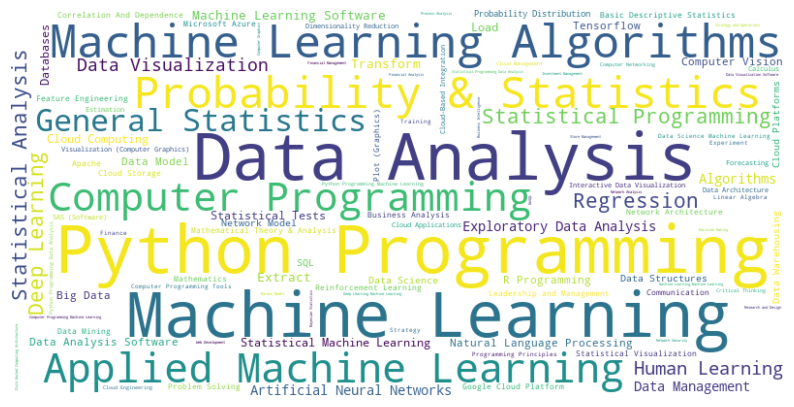

In [579]:
# The most common skills within intermediate courses
from collections import Counter
from wordcloud import WordCloud

intermediate_skills = Counter(" ".join(intermediate["Skills"].dropna()).split(','))

# Generate the word cloud
wordcloud = WordCloud(collocations=False, width=800, height=400, background_color ='white').generate_from_frequencies(intermediate_skills)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

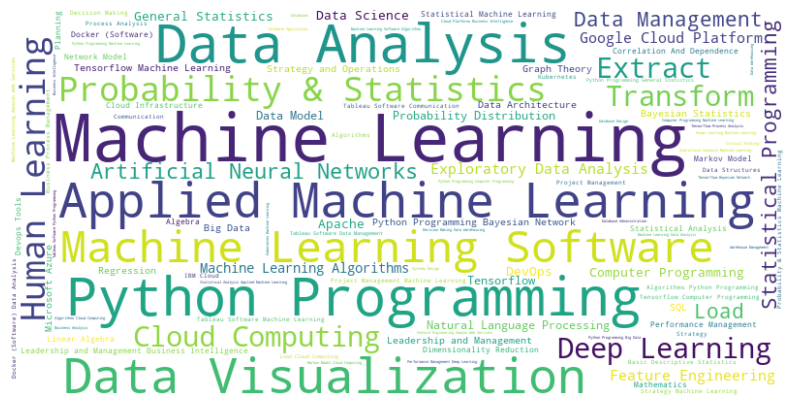

In [580]:
# The most common skills within advanced courses
advanced_skills = Counter(" ".join(advanced["Skills"].dropna()).split(','))

# Generate the word cloud
wordcloud = WordCloud(collocations=False, width=800, height=400, background_color ='white').generate_from_frequencies(advanced_skills)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---
> **How many courses will provide certificates to put on my CV?**

In [581]:
certification = df['Cert'].unique()

for i, val in enumerate(certification):
    cert = df[df['Cert'] == val]
    print(val, ':', len(cert))

Professional Certificate : 30
Specialization : 111
Course : 612
Guided Project : 236
Project : 11


---
> **What kind of projects can I enroll on to test my knowledge?**

In [582]:
# Best beginner-level project to practise skills
projects_courses = df[df['Cert'].str.contains('Project')]

projects_kind = projects_courses['Cert'].unique()

for val in projects_kind:
    cert = df[df['Cert'] == val]
    print(val, ':', f'{len(cert)}')

Guided Project : 236
Project : 11


In [587]:
best_projects = projects_courses[(projects_courses['Score'] > 4.5) & (projects_courses['Reviews'] > 100) & (projects_courses['Level'] == 'Beginner')]
best_projects

,Course_Name,Company,Degree,Score,Reviews,Skills,IsFree,Course_Url,Level,Cert,Time
197,HR Analytics- Build an HR dashboard using Powe...,Coursera Project Network,NaN,4.6,238,"Data Visualization, Human Resources",NaN,https://www.coursera.org/projects/hr-analytics...,Beginner,Guided Project,Less Than 2 Hours
367,"Prepare, Clean, Transform, and Load Data using...",Coursera Project Network,NaN,4.6,543,"Data Analysis, Data Analysis Software, Extract...",NaN,https://www.coursera.org/projects/prepare-clea...,Beginner,Guided Project,Less Than 2 Hours
379,NLP: Twitter Sentiment Analysis,Coursera Project Network,NaN,4.6,354,"Machine Learning, Natural Language Processing,...",NaN,https://www.coursera.org/projects/twitter-sent...,Beginner,Guided Project,Less Than 2 Hours
521,Getting Started with Rstudio,Coursera Project Network,NaN,4.6,131,R Programming,NaN,https://www.coursera.org/projects/getting-star...,Beginner,Guided Project,Less Than 2 Hours
583,Unsupervised Machine Learning for Customer Mar...,Coursera Project Network,NaN,4.7,329,"Machine Learning, Python Programming",NaN,https://www.coursera.org/projects/machine-lear...,Beginner,Guided Project,Less Than 2 Hours
605,Mastering Data Analysis with Pandas,Coursera Project Network,NaN,4.6,146,"Computer Programming, Data Analysis, Python Pr...",NaN,https://www.coursera.org/projects/learning-pat...,Beginner,Guided Project,Less Than 2 Hours
612,Fake News Detection with Machine Learning,Coursera Project Network,NaN,4.6,246,"Machine Learning, Natural Language Processing,...",NaN,https://www.coursera.org/projects/nlp-fake-new...,Beginner,Guided Project,Less Than 2 Hours
661,Basic Image Classification with TensorFlow,Coursera Project Network,NaN,4.6,817,"Artificial Neural Networks, Deep Learning, Mac...",NaN,https://www.coursera.org/projects/tensorflow-b...,Beginner,Guided Project,Less Than 2 Hours


In [592]:
# Certificates per specific skill
stats_projects = stats_courses[stats_courses['Cert'].str.contains('Project')]
sql_projects = sql_courses[sql_courses['Cert'].str.contains('Project')]
python_projects = python_courses[python_courses['Cert'].str.contains('Project')]
visual_projects = visual_courses[visual_courses['Cert'].str.contains('Project')]

all = {'Statistics': stats_projects,
       'SQL': sql_projects, 
       'Python': python_projects, 
       'Visualization': visual_projects}

for key in all:
    print(f'{key} projects: {len(all[key])}')

Statistics projects: 5
SQL projects: 12
Python projects: 100
Visualization projects: 41


---
> **How much time will I have to commit to learn Data Science from scratch?**

In [584]:
# Choosing a course path including one course for: Statistics, SQL, Python and Data Visualisation
def time_split(df, column):
    time = df[column].str[:5]
    frequency = df[column].str[6:]
    time = time.str.split('-', expand=True).map(str.strip)
    time.columns = ['MinTime', 'MaxTime']
    return pd.concat([time, frequency], axis=1)

courses_path = df.iloc[[39, 94, 77, 227]]
courses_time = time_split(courses_path, 'Time')

# Calculating minimum and maximum time to complete
def min_time_in_days(row):
  frequency = row['Time']
  if frequency == 'Months':
    return pd.to_numeric(row['MinTime']) * 30
  else:
    return pd.to_numeric(row['MinTime']) * 7

def max_time_in_days(row):
  frequency = row['Time']
  if frequency == 'Months':
    return pd.to_numeric(row['MaxTime']) * 30
  else:
    return pd.to_numeric(row['MaxTime']) * 7

courses_time['MinTimeInDays'] = courses_time.apply(min_time_in_days, axis=1)
courses_time['MaxTimeInDays'] = courses_time.apply(max_time_in_days, axis=1)

print(f'learning will take between {courses_time['MinTimeInDays'].sum()} and {courses_time['MaxTimeInDays'].sum()} days')

learning will take between 360 and 720 days
